## Create a NLP Pipeline to 'Clean' Reviews Data
- Load Input File and Read Reviews
- Tokenize
- Remove Stopwords
- Perform Stemming
- Write cleaned data to output file

In [1]:
sample_text = """I loved this movie since I was 7 and I saw it on the opening day. 
                It was so touching and beautiful. I strongly recommend seeing for all. 
                It's a movie to watch with your family by far.<br /><br />
                My MPAA rating: PG-13 for thematic elements, prolonged scenes of disastor,
                nudity/sexuality and some language."""

## NLTK

In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
import pandas as pd


In [3]:
# Initialise objects

# 'r' stands for Regular Expression and '\w+' indicates that include All Words
tokenizer = RegexpTokenizer(r'\w+')

# Only calling english stopwords
en_stopwords = set(stopwords.words('english'))

ps = PorterStemmer()

In [4]:
def getStemmedReview(review):
    
    review = review.lower()
    review = review.replace('<br /><br />',' ')# removing <br /><br />  
    
    # Tokenize
    
# Tokenization is important so that each word is treated as word('loved') only not as character('l','o','v','e','d')
    tokens = tokenizer.tokenize(review)
    
    new_tokens = [token for token in tokens if token not in en_stopwords]
    
# Stemming is done to make a word 'loved' as 'love'
    stemmed_tokens = [ps.stem(token) for token in new_tokens]
    
#  We used ' '.join() func to make our list look like a string 
#  in which after every word is seperate them by putting a ' '. 
    cleaned_review = ' '.join(stemmed_tokens)
    
    return cleaned_review

In [5]:
getStemmedReview(sample_text)

'love movi sinc 7 saw open day touch beauti strongli recommend see movi watch famili far mpaa rate pg 13 themat element prolong scene disastor nuditi sexual languag'

In [6]:
def getStemmedDocument(inputFile,outputFile):
    
    out = open(outputFile,'w')
    
    with open(inputFile) as f:
        reviews = f.readlines()
        
    for review in reviews:
        cleaned_review = getStemmedReview(review)
        print((cleaned_review),file=out)
    out.close()
        

# Multinomial Event Model

In [7]:
import pandas as pd
import numpy as np

In [8]:
# dfx = pd.read_csv("Review.csv")
# dfy = pd.read_csv("Review_y.csv")
# print(dfx)

dfx = pd.read_csv("amazonReviews.csv")

# to remove 'nan'
dfx.dropna(subset=['reviews.rating'], inplace = True)

#to remove integer values
# In the regular expression \d stands for "any digit" and + stands for "one or more".
dfx['reviews.title'] = dfx['reviews.title'].str.replace('\d+',' ')

# dfx = dfx[0:200]

print(dfx[['reviews.title','reviews.rating']].head())
# print(dfx[["reviews.rating"]].shape)



                                reviews.title  reviews.rating
0              Paperwhite voyage, no regrets!             5.0
1           One Simply Could Not Ask For More             5.0
2  Great for those that just want an e-reader             4.0
3                    Love / Hate relationship             5.0
4                                   I LOVE IT             5.0


In [9]:
x = dfx['reviews.title'].tolist()

y = dfx["reviews.rating"].tolist()

y = np.array(y)

print(y)

for i in range (0,1177):
    if y[i] >3:
        y[i] = 1
    else:
        y[i] = 0
        
print(y)

[5. 5. 4. ... 1. 3. 1.]
[1. 1. 1. ... 0. 0. 0.]


In [10]:
# x_test = ["I was happy and I love the acting in the movie",
#           "The movie i saw was bad"]

dfxt = pd.read_csv("flipauto.csv")
print(dfxt.shape)

x_test =dfxt["Titles"]
# x_test = x_test[0:10].tolist()
print(x_test.head(15))



(100, 2)
0                 Wonderful
1     Mind-blowing purchase
2               Good choice
3                 Brilliant
4               Bad quality
5         Terrific purchase
6                 Must buy!
7                 Must buy!
8                   Awesome
9                 Wonderful
10           Classy product
11                Excellent
12                Just wow!
13        Worth every penny
14               Delightful
Name: Titles, dtype: object


### 1.Cleaning 

In [11]:
import clean_review as ct

In [12]:
x_clean = [ct.getStemmedReview(i) for i in x]
xt_clean = [ct.getStemmedReview(i) for i in x_test]

In [13]:
print(x_clean)
print(xt_clean)

['paperwhit voyag regret', 'one simpli could ask', 'great want e reader', 'love hate relationship', 'love', 'like smaller size', 'superb read devic one best', 'love', 'un plaisir', 'work great love built light', 'tr util', 'kindl found easi find need', 'seamless reas experi', 'great addit kindl rang', 'great kindl', 'want dedic e reader got peopl found help review help ye', 'kindl vs nook updat peopl found help review help ye', 'worth money perfect good start finish novel good light peopl found help review help ye', 'worth money perfect good start finish novel good light peopl found help review help ye', 'want dedic e reader got peopl found help review help ye', 'kindl vs nook updat peopl found help review help ye', 'work great one critic flaw significantli improv peopl found help review help ye', 'box game changer demand content amazon knock park refresh updat tip hbo go peopl found help review help ye', 'work great one critic flaw significantli improv peopl found help review help ye'

### 2. Vectorization

In [14]:
from sklearn.feature_extraction.text  import CountVectorizer

In [15]:
cv = CountVectorizer()
x_vec =cv.fit_transform(x_clean).toarray()

print("SPARSE MATRIX")

print(x_vec)
print(x_vec.shape)

SPARSE MATRIX
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1177, 739)


In [16]:
# Above is the matrix of the frequency of occurence of a word in one review, below are the attributes or the word that 
# whose frequency is shown


print(cv.get_feature_names())

['abl', 'academ', 'access', 'accessori', 'actual', 'adapt', 'add', 'addit', 'address', 'adequ', 'aesthet', 'afford', 'ago', 'alarm', 'alexa', 'alexea', 'alexxa', 'alittl', 'almost', 'alreadi', 'also', 'alt', 'altern', 'alway', 'amaz', 'amazion', 'amazon', 'amost', 'amount', 'angri', 'annoy', 'anoth', 'answer', 'antutu', 'anyth', 'anytim', 'apart', 'app', 'appl', 'applic', 'apri', 'arent', 'around', 'art', 'ask', 'assist', 'attempt', 'attract', 'avail', 'awesom', 'babi', 'back', 'bad', 'bar', 'bargain', 'base', 'basic', 'bass', 'batteri', 'beach', 'beauti', 'beginn', 'benchmark', 'best', 'better', 'bewar', 'big', 'bill', 'black', 'bland', 'blue', 'bluetooth', 'blutooth', 'book', 'bought', 'box', 'brain', 'brilliant', 'bring', 'brother', 'brought', 'brows', 'bt', 'bubbl', 'budget', 'built', 'bum', 'bundl', 'button', 'buy', 'buyer', 'camera', 'cancel', 'card', 'carri', 'case', 'categori', 'cellphon', 'changer', 'charg', 'charger', 'charm', 'cheap', 'cheaper', 'check', 'child', 'choic', 'c

In [17]:
## Vectorization on the test set
xt_vec = cv.transform(xt_clean).toarray()
print(xt_vec)
cv.get_feature_names()
print(xt_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(100, 739)


### 3. Multinomial Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [19]:
mnb = MultinomialNB()
print(mnb)

MultinomialNB()


In [20]:
# Training
mnb.fit(x_vec,y)

MultinomialNB()

In [83]:
# Predictions
import numpy as np

overall = np.array(mnb.predict(x_vec))
print(mnb.predict(x_vec))

overall = np.average(overall)
print(overall*100)

[1. 1. 1. ... 0. 1. 0.]
86.15123194562447


In [84]:
mnb.score(x_vec,y)

0.9396771452846219

## Bernoulli Naive Bayes

In [23]:
bnb = BernoulliNB()
print(bnb)

BernoulliNB()


In [24]:
# Training

bnb.fit(x_vec,y)

BernoulliNB()

In [25]:
bnb.predict(xt_vec)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
bnb.score(x_vec,y)

0.9099405267629567

##  Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtc = DecisionTreeClassifier()
print(dtc)

DecisionTreeClassifier()


In [29]:
dtc.fit(x_vec,y)

DecisionTreeClassifier()

In [30]:
dtc.predict(xt_vec)

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.])

In [31]:
dtc.score(x_vec,y)

0.9906542056074766

## SVM

In [32]:
from sklearn import svm

In [33]:
svmc = svm.SVC()
print(svmc)

SVC()


In [34]:
svmc.fit(x_vec,y)


SVC()

In [35]:
svmc.predict(xt_vec)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
svmc.score(x_vec,y)

0.9303313508920985

##  Neural Network MLP Classifier

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
mlpc = MLPClassifier()

In [39]:
mlpc.fit(x_vec,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

In [85]:
mlpc.predict(x_vec)

array([1., 1., 1., ..., 0., 0., 0.])

In [86]:
mlpc.score(x_vec,y)

0.9889549702633815

## Confusion matrix

In [87]:
from sklearn.metrics import confusion_matrix

In [90]:
mlpc_y = mlpc.predict(x_vec)
confusion_matrix(y,mlpc_y)

array([[190,  10],
       [  3, 974]])

In [91]:
mnb_y = mnb.predict(x_vec)
confusion_matrix(y,mnb_y)

array([[146,  54],
       [ 17, 960]])

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


### Confusion Matrix of MLP Classifier

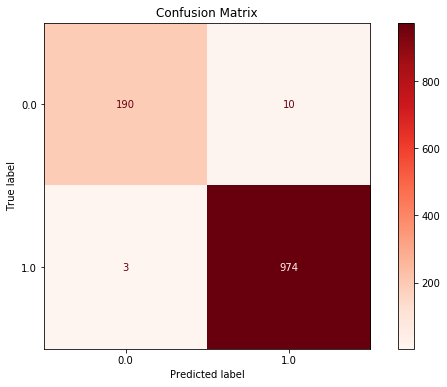

In [93]:
matrix = plot_confusion_matrix(mlpc,x_vec,y,cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='Black')

plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,6)
plt.show()

### Confusion Matrix of Multinomial Naive Bayes


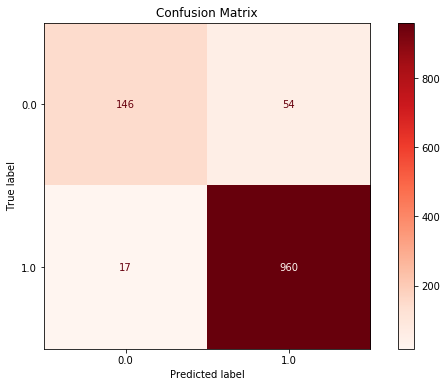

In [94]:
matrix = plot_confusion_matrix(mnb,x_vec,y,cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='Black')

plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,6)
plt.show()

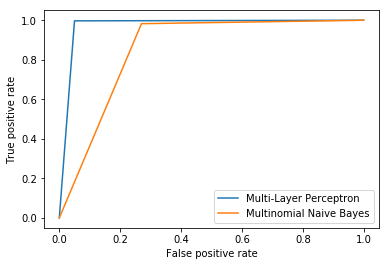

In [95]:
from sklearn import metrics

fprm,tprm,thresholdsm = metrics.roc_curve(y,mnb.predict(x_vec),pos_label=1)
fprn,tprn,thresholdsn = metrics.roc_curve(y,mlpc.predict(x_vec),pos_label=1)
    

    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fprn,tprn,label='Multi-Layer Perceptron')
plt.plot(fprm,tprm,label='Multinomial Naive Bayes')
plt.legend()
plt.show()

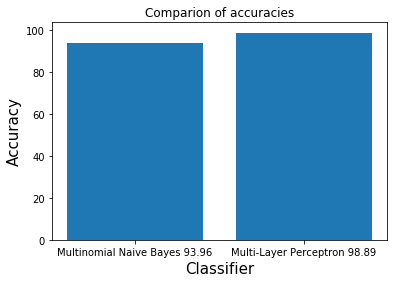

In [104]:
mnb_accuracy = (mnb.score(x_vec,y)*100)
mlpc_accuracy = (mlpc.score(x_vec,y)*100)
label = ['Multinomial Naive Bayes 93.96','Multi-Layer Perceptron 98.89']
index = np.arange(len(label))
acc = [mnb_accuracy,mlpc_accuracy]
plt.xlabel('Classifier',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Comparion of accuracies')
plt.bar(index,acc)
plt.xticks(index,label,fontsize = 10,rotation=0)
plt.show()